In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
import csv

In [5]:
dataset = pd.read_csv("ogrenci_dekanligi_ins.csv")

In [6]:
dataset

,Content,Comments,Number of Comments
0,İSTANBUL NİŞANTAŞI ÜNİVERSİTESİ ÖĞRENCİ DEKANL...,We wish you a year full of health joy and happ...,1
1,İstanbul Nişantaşı Üniversitesi Öğrenci Dekanl...,NaN,0
2,İstanbul Nişantaşı Üniversitesi Öğrenci Dekanl...,NaN,0
3,İstanbul Nişantaşı Üniversitesi Longboard ve S...,NaN,0
4,6-10 Nisan 2023 tarihlerinde Romanya’da katılm...,We are stronger when we come together and We ...,1
...,...,...,...
56,İstanbul Nişantaşı Üniversitesi ESN Nişantaşı ...,NaN,0
57,İstanbul Nişantaşı Üniversitesi’nde Oryantasyo...,"😍😍,🔥🔥🔥",2
58,İstanbul Nişantaşı Üniversitesi oryantasyon ha...,"🔥,🙌🙌,❤️",3
59,İstanbul Nişantaşı Üniversitesi 2021-2022 yılı...,NaN,0


In [7]:
import pandas as pd

dataset = pd.read_csv("ogrenci_dekanligi_ins.csv")

dataset["Number of Comments"] = dataset["Number of Comments"].astype(int)

en_cok_yorum_alan_icerikler = dataset.nlargest(5, "Number of Comments")

print("EN YÜKSEK YORUM SAYISINA SAHİP OLAN İÇERİKLER")

for index, row in en_cok_yorum_alan_icerikler.iterrows():
    print(f"Content: {row['Content']}")
    print(f"Yorum Sayısı: {row['Number of Comments']}")
    print()

EN YÜKSEK YORUM SAYISINA SAHİP OLAN İÇERİKLER
Content: Meet the people who make it happen!!! Here is a an introduction of our club council, an insight into our Multicultural family working together to make it all possible for you. We can’t wait for you guys to be a part of this fun fam and make our university life enjoyable and exciting!! So join us in our events and get a chance to be an active member and worker of Nish Multicultural Club 🙌🏻 #mccnish
Yorum Sayısı: 17

Content: Nişantaşı Üniversitesi Erasmus Plus Kulübü olarak, ülkemizin ve iş dünyamızın dünya pazarlarında ki etkinliğinin artırılması amacıyla iki yılda bir düzenlenen 18 farklı sektörden katılımcının ağırlandığı MÜSİAD EXPO Fuarına katılım sağladık. Davetleri ve destekleri için @gencmusiad a teşekkürlerimizi sunarız.
Yorum Sayısı: 5

Content: İstanbul Nişantaşı Üniversitesi Öğrenci Dekanlığı olarak Öğrenci Konseyi üyesi ve Öğrenci Kulüp Başkanlarımızla birlikte Ata’mıza ziyarette bulunduk.
Yorum Sayısı: 3

Content: Nişa

In [5]:
toplam_icerik_sayisi = len(dataset)
toplam_yorum_sayisi = dataset['Number of Comments'].sum()

print("Toplam İçerik Sayısı:", toplam_icerik_sayisi)
print("Toplam Yorum Sayısı:", toplam_yorum_sayisi)

Toplam İçerik Sayısı: 61
Toplam Yorum Sayısı: 62


In [8]:
import plotly.graph_objects as go

toplam_icerik_sayisi = len(dataset)
toplam_yorum_sayisi = dataset['Number of Comments'].sum()

labels = ['Toplam İçerik Sayısı', 'Toplam Yorum Sayısı']
values = [toplam_icerik_sayisi, toplam_yorum_sayisi]

fig = go.Figure(data=[go.Bar(x=labels, y=values)])

fig.update_traces(texttemplate='%{y} adet', textposition='inside')

fig.update_layout(
    yaxis_title='Sayı',
    title='Toplam İçerik ve Yorum Sayısı')
fig.show()


In [7]:
icerik_yorum_sayisi = dataset['Number of Comments'].value_counts()

icerik_yorum_df = pd.DataFrame({'Yorum Sayısı': icerik_yorum_sayisi.index, 'icerik Sayısı': icerik_yorum_sayisi.values})

icerik_yorum_df = icerik_yorum_df.sort_values(by='Yorum Sayısı', ascending=False)

icerik_yorum_df.index = range(1, len(icerik_yorum_df) + 1)

print(icerik_yorum_df)

   Yorum Sayısı  icerik Sayısı
1            17              1
2             5              1
3             3              7
4             2              5
5             1              9
6             0             38


In [9]:
import plotly.graph_objects as go

yorum_sayisi = [17, 5, 3, 2, 1, 0]
icerik_sayisi = [1, 1, 7, 5, 9, 38]

x = list(range(len(yorum_sayisi)))

fig = go.Figure()

fig.add_trace(go.Bar(x=x, y=yorum_sayisi))

fig.update_layout(
    xaxis_title='İçerik Sayısı',
    yaxis_title='Yorum Sayısı',
    title='İçeriklere Göre Yorum Sayıları'
)

fig.update_layout(xaxis_tickangle=0, xaxis_tickmode='array', xaxis_tickvals=x, xaxis_ticktext=icerik_sayisi)

fig.show()

In [10]:
import pandas as pd
import plotly.graph_objects as go

dataset = pd.read_csv('ogrenci_dekanligi_ins.csv')

dataset['Yorum Oranı'] = (dataset['Number of Comments'] / dataset['Number of Comments'].sum()) * 100

en_cok_yorum_alan_icerikler = dataset.nlargest(10, 'Number of Comments')

veriler = en_cok_yorum_alan_icerikler['Number of Comments']
etiketler = en_cok_yorum_alan_icerikler['Content'].str.split().str[:4].str.join(' ') + '...'

fig = go.Figure(data=[go.Pie(labels=etiketler, values=veriler, textinfo='value')])

fig.update_layout(title='En Çok Yorum Alan İçerikler ve Yorum Sayısı')

fig.show()

In [11]:
from collections import Counter
import re

tum_yorumlar = ' '.join(dataset['Comments'].dropna())

tum_yorumlar = tum_yorumlar.lower()
tum_yorumlar = re.sub(r'[^a-zA-Z0-9ğüşöçıi\s]', '', tum_yorumlar)
tum_yorumlar = re.sub(r'\s+', ' ', tum_yorumlar)

kelimeler = tum_yorumlar.split()
kelime_sayilari = Counter(kelimeler)

en_cok_gecenler = kelime_sayilari.most_common(50)

print("YORUMLARDA EN ÇOK TEKRAR EDEN 50 KELİME")

for kelime, sayi in en_cok_gecenler:
    print(f"{kelime}: {sayi} defa")


YORUMLARDA EN ÇOK TEKRAR EDEN 50 KELİME
the: 7 defa
we: 6 defa
and: 4 defa
you: 3 defa
of: 3 defa
a: 2 defa
for: 2 defa
your: 2 defa
have: 2 defa
çok: 2 defa
video: 2 defa
editing: 2 defa
is: 2 defa
wish: 1 defa
year: 1 defa
full: 1 defa
health: 1 defa
joy: 1 defa
happiness: 1 defa
are: 1 defa
stronger: 1 defa
when: 1 defa
come: 1 defa
together: 1 defa
want: 1 defa
to: 1 defa
express: 1 defa
my: 1 defa
gratitude: 1 defa
invaluable: 1 defa
help: 1 defa
support: 1 defa
has: 1 defa
been: 1 defa
constant: 1 defa
source: 1 defa
strength: 1 defa
us: 1 defa
could: 1 defa
not: 1 defa
achieved: 1 defa
what: 1 defa
without: 1 defa
avrupanınzirvesi: 1 defa
iyi: 1 defa
haftaalaaar: 1 defa
okulumuza: 1 defa
ve: 1 defa
sizlere: 1 defa
destekleri: 1 defa


In [12]:
kelimeler_liste = [kelime for kelime, _ in en_cok_gecenler]
sayilar_liste = [sayi for _, sayi in en_cok_gecenler]

fig = go.Figure(data=[go.Pie(labels=kelimeler_liste, values=sayilar_liste, textinfo='value')])

fig.update_layout(
    title='Yorumlarda En Çok Tekrar Eden 50 Kelime',
    showlegend=True,
    width=1000,
    height=800
)

fig.show()

In [13]:
import pandas as pd
import plotly.graph_objects as go

tum_yorumlar = ' '.join(dataset['Comments'].dropna())

tum_yorumlar = tum_yorumlar.lower()
tum_yorumlar = re.sub(r'[^a-zA-Z0-9ğüşöçıi\s]', '', tum_yorumlar)
tum_yorumlar = re.sub(r'\s+', ' ', tum_yorumlar)

kelimeler = tum_yorumlar.split()
kelime_sayilari = Counter(kelimeler)

en_cok_gecenler = kelime_sayilari.most_common(50)

kelimeler_liste = [kelime for kelime, _ in en_cok_gecenler]
sayilar_liste = [sayi for _, sayi in en_cok_gecenler]

fig = go.Figure(data=[go.Bar(x=kelimeler_liste, y=sayilar_liste)])

fig.update_layout(
    xaxis_title='Kelimeler',
    yaxis_title='Tekrar Sayısı',
    title='Yorumlarda En Çok Tekrar Eden 50 Kelime',
    xaxis_tickangle=-90  # X eksenindeki etiketleri döndürme
)

fig.show()

In [14]:
from collections import Counter
import re

tum_yorumlar = ' '.join(dataset['Comments'].dropna())

tum_yorumlar = tum_yorumlar.lower()
tum_yorumlar = re.sub(r'[^a-zA-Z0-9ğüşöçıi\s]', '', tum_yorumlar)
tum_yorumlar = re.sub(r'\s+', ' ', tum_yorumlar)

kelimeler = tum_yorumlar.split()
kelime_sayilari = Counter(kelimeler)

en_cok_gecenler = kelime_sayilari.most_common(10)

print("YORUMLARDA EN ÇOK TEKRAR EDEN 10 KELİME")

for kelime, sayi in en_cok_gecenler:
    print(f"{kelime}: {sayi} defa")

YORUMLARDA EN ÇOK TEKRAR EDEN 10 KELİME
the: 7 defa
we: 6 defa
and: 4 defa
you: 3 defa
of: 3 defa
a: 2 defa
for: 2 defa
your: 2 defa
have: 2 defa
çok: 2 defa


In [15]:
import re
from collections import Counter
import plotly.graph_objects as go

tum_yorumlar = ' '.join(dataset['Comments'].dropna())

tum_yorumlar = tum_yorumlar.lower()
tum_yorumlar = re.sub(r'[^a-zA-Z0-9ğüşöçıi\s]', '', tum_yorumlar)
tum_yorumlar = re.sub(r'\s+', ' ', tum_yorumlar)

kelimeler = tum_yorumlar.split()
kelime_sayilari = Counter(kelimeler)

en_cok_gecenler = kelime_sayilari.most_common(10)

kelimeler_liste = [kelime for kelime, _ in en_cok_gecenler]
sayilar_liste = [sayi for _, sayi in en_cok_gecenler]

fig = go.Figure(data=[go.Pie(labels=kelimeler_liste, values=sayilar_liste, textinfo='value')])

fig.update_layout(
    title='Yorumlarda En Çok Tekrar Eden 10 Kelime ve Tekrar Sayıları',
    showlegend=True,
    width=800,
    height=600
)

fig.show()

In [16]:
import pandas as pd
import plotly.graph_objects as go

tum_yorumlar = ' '.join(dataset['Comments'].dropna())

tum_yorumlar = tum_yorumlar.lower()
tum_yorumlar = re.sub(r'[^a-zA-Z0-9ğüşöçıi\s]', '', tum_yorumlar)
tum_yorumlar = re.sub(r'\s+', ' ', tum_yorumlar)

kelimeler = tum_yorumlar.split()
kelime_sayilari = Counter(kelimeler)

en_cok_gecenler = kelime_sayilari.most_common(10)

kelimeler_liste = [kelime for kelime, _ in en_cok_gecenler]
sayilar_liste = [sayi for _, sayi in en_cok_gecenler]

fig = go.Figure(data=[go.Bar(x=kelimeler_liste, y=sayilar_liste)])

fig.update_layout(
    xaxis_title='Kelimeler',
    yaxis_title='Tekrar Sayısı',
    title='Yorumlarda En Çok Tekrar Eden 10 Kelime',
    xaxis_tickangle=-45  # X eksenindeki etiketleri döndürme
)

fig.show()

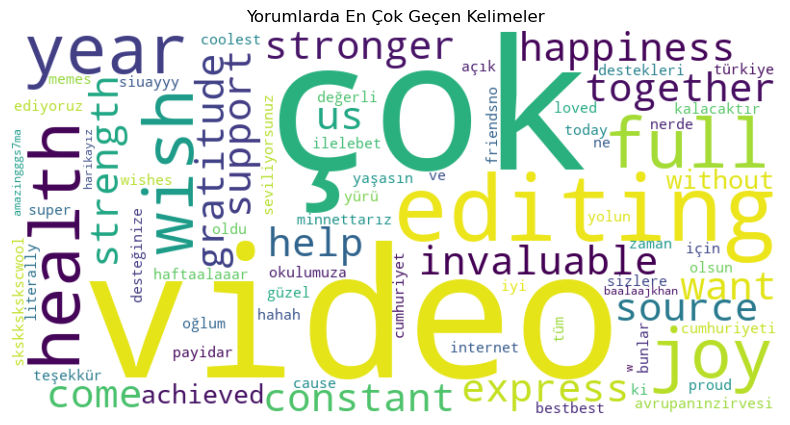

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

tum_yorumlar = ' '.join(dataset['Comments'].dropna())

tum_yorumlar = tum_yorumlar.lower()
tum_yorumlar = re.sub(r'[^a-zA-Z0-9ğüşöçıi\s]', '', tum_yorumlar)
tum_yorumlar = re.sub(r'\s+', ' ', tum_yorumlar)

kelime_bulutu = WordCloud(width=800, height=400, background_color='white').generate(tum_yorumlar)

plt.figure(figsize=(10, 5))
plt.imshow(kelime_bulutu, interpolation='bilinear')
plt.axis('off')
plt.title('Yorumlarda En Çok Geçen Kelimeler')
plt.show()

In [18]:
import pandas as pd

dataset = pd.read_csv("ogrenci_dekanligi_ins.csv")

dataset = dataset.dropna(subset=["Comments"])

linkedin_yorumlar_veriSeti = pd.DataFrame(columns=["Yorum"])

for _, row in dataset.iterrows():
    yorumlar = row["Comments"].split(",")
    for yorum in yorumlar:
        linkedin_yorumlar_veriSeti = pd.concat([linkedin_yorumlar_veriSeti, pd.DataFrame({"Yorum": [yorum.strip()]})], ignore_index=True)

linkedin_yorumlar_veriSeti.to_csv("ogrenci_dekanligi_ins_yorumlar.csv", index=False)
print("Yeni Veri Seti kaydedildi: ogrenci_dekanligi_ins_yorumlar.csv")

Yeni Veri Seti kaydedildi: ogrenci_dekanligi_ins_yorumlar.csv


In [19]:
import pandas as pd

linkedin_yorumlar_veriSeti = pd.read_csv("ogrenci_dekanligi_ins_yorumlar.csv")

yorumlar = pd.DataFrame({'Yorumlar': linkedin_yorumlar_veriSeti['Yorum']})

for index, row in yorumlar.iterrows():
    print(f"{index+1}: {row['Yorumlar']}")

1: We wish you a year full of health joy and happiness 🤞💚🥰
2: We are stronger when we come together  and We want to express my gratitude for your invaluable help. Your support has been a constant source of strength for us  and we could not have achieved what we have without you ❤️‍🔥🫶
3: #AvrupanınZirvesi 🙌🔥
4: ❤️‍🔥❤️‍🔥❤️‍🔥❤️‍🔥❤️‍🔥❤️‍🔥
5: 👏👏👏
6: 🙌
7: İyi haftaalaaar ❤️‍🔥❤️‍🔥
8: ❤️❤️
9: Okulumuza ve sizlere destekleri için çok teşekkür ediyoruz ❤️🌙
10: 🇹🇷❤️🤍
11: ❤️🇹🇷
12: 🇹🇷🇹🇷🇹🇷🇹🇷🇹🇷💣💣💣💣
13: Yürü güzel oğlum yolun açık olsun.
14: 💯🙌👏
15: 🙌
16: 👋❤️‍🔥✨
17: 💣💣💣💣❤️❤️❤️❤️❤️
18: 🔥🙌
19: 🙌🙌
20: 👏👏👏
21: 🔥🔥🔥
22: 🙌🔥
23: 👏
24: ❤️
25: 👏👏
26: Türkiye Cumhuriyeti ilelebet payidar kalacaktır 🇹🇷🤍
27: Yaşasın Cumhuriyet❤️
28: ❤️❤️❤️
29: ❤️❤️
30: Tüm değerli desteğinize minnettarız çok seviliyorsunuz❤️
31: 👏👏
32: Siu
33: Ayyy 🙌
34: 🔥🔥🔥
35: The coolest video on the internet today 🫶🏻
36: 😂😂😂😂😂😂😂
37: Hahah loved the video and the editing 🔥
38: The memes were the best💀💀😭
39: Best wishes 🥰💚👌
40: 👏👏🔥🔥
41: 👏🏻👏🏻👏🏻👏🏻

In [22]:
import regex
from collections import Counter

yorumlar = linkedin_yorumlar_veriSeti["Yorum"].tolist()
emojiler = []

emoji_pattern = regex.compile(r"\X")

for yorum in yorumlar:
    yorum = str(yorum)  
    emoji_listesi = [emoji for emoji in emoji_pattern.findall(yorum) if not regex.match(r"[\p{L}\p{P}\p{N}\s$+©️<®️✧]", emoji)]
    emojiler.extend(emoji_listesi)

toplam_emoji_sayisi = len(emojiler)
print("Toplam emoji sayısı:", toplam_emoji_sayisi)

tur_sayisi = len(set(emojiler))
print("Kaç tür emoji:", tur_sayisi)

emoji_sayilari = Counter(emojiler)

emoji_sayilari = dict(sorted(emoji_sayilari.items(), key=lambda x: x[1], reverse=True))

for emoji, sayi in emoji_sayilari.items():
    print(emoji, ":", sayi)

Toplam emoji sayısı: 159
Kaç tür emoji: 31
🔥 : 26
❤️ : 25
👏 : 15
🙌 : 14
❤️‍🔥 : 11
🇹🇷 : 8
💣 : 8
😂 : 7
👏🏻 : 6
😍 : 6
✨ : 4
🫶🏻 : 3
👌🏻 : 3
💚 : 2
🥰 : 2
🤍 : 2
💀 : 2
🌸 : 2
🤞 : 1
🫶 : 1
🌙 : 1
💯 : 1
👋 : 1
😭 : 1
👌 : 1
👍 : 1
🍃 : 1
🚴 : 1
⛴️ : 1
🥹 : 1
🧿 : 1


In [ ]:
YORUMLARDA EN ÇOK TEKRAR EDEN 31 EMOJİ - SÜTUN GRAFİĞİ

In [24]:
import regex
from collections import Counter
import plotly.graph_objects as go

yorumlar = linkedin_yorumlar_veriSeti["Yorum"].tolist()
emojiler = []

emoji_pattern = regex.compile(r"\X")

for yorum in yorumlar:
    yorum = str(yorum)  
    emoji_listesi = [emoji for emoji in emoji_pattern.findall(yorum) if not regex.match("\p{L}|\p{P}|\p{N}|\s", emoji)]
    emojiler.extend(emoji_listesi)

emoji_sayilari = Counter(emojiler)

emoji_sayilari = dict(sorted(emoji_sayilari.items(), key=lambda x: x[1], reverse=True)[:31])

emojiler = list(emoji_sayilari.keys())
tekrar_sayilari = list(emoji_sayilari.values())

fig = go.Figure(data=[go.Bar(x=emojiler, y=tekrar_sayilari)])

fig.update_layout(
    title='En Çok Tekrar Eden Emojiler ve Tekrar Sayıları',
    xaxis_title='Emoji',
    yaxis_title='Tekrar Sayısı',
    xaxis_tickangle=90,
)

fig.show()

In [25]:
import regex
from collections import Counter
import plotly.graph_objects as go

yorumlar = linkedin_yorumlar_veriSeti["Yorum"].tolist()
emojiler = []

emoji_pattern = regex.compile(r"\X")

for yorum in yorumlar:
    yorum = str(yorum)  
    emoji_listesi = [emoji for emoji in emoji_pattern.findall(yorum) if not regex.match("\p{L}|\p{P}|\p{N}|\s", emoji)]
    emojiler.extend(emoji_listesi)

emoji_sayilari = Counter(emojiler)

emoji_sayilari = dict(sorted(emoji_sayilari.items(), key=lambda x: x[1], reverse=True)[:31])

emojiler = list(emoji_sayilari.keys())
tekrar_sayilari = list(emoji_sayilari.values())

fig = go.Figure(data=[go.Pie(labels=emojiler, values=tekrar_sayilari)])

fig.update_traces(textposition='inside', textinfo='label+value', textfont_size=10)

fig.update_layout(
    title='En Çok Tekrar Eden Emojiler ve Tekrar Sayıları',
    width=1000,
    height=800
)

fig.show()

In [27]:
import regex
from collections import Counter

yorumlar = linkedin_yorumlar_veriSeti["Yorum"].tolist()

# Olumlu emojiler
olumlu_emojiler = ['🔥','❤️','👏','❤️‍🔥','👏🏻','😍','🫶🏻','💚','🥰','🤍','🌸','🫶','']        

# Olumsuz emojiler
olumsuz_emojiler = ['😭','🥹']        

# Nötr emojiler
notr_emojiler = ['🙌','🇹🇷','💣','😂','✨','👌🏻','💀','🤞','🌙','💯','👋','👌','👍','🍃','🚴','⛴️','🧿']        

emojiler = []

emoji_pattern = regex.compile(r"\X")

for yorum in yorumlar:
    yorum = str(yorum)  
    emoji_listesi = [emoji for emoji in emoji_pattern.findall(yorum) if not regex.match(r"[\p{L}\p{P}\p{N}\s$+©️<®️✧]", emoji)]
    emojiler.extend(emoji_listesi)

emoji_sayilari = Counter(emojiler)

olumlu_emoji_sayisi = sum(emoji_sayilari[emoji] for emoji in olumlu_emojiler)

olumsuz_emoji_sayisi = sum(emoji_sayilari[emoji] for emoji in olumsuz_emojiler)

notr_emoji_sayisi = sum(emoji_sayilari[emoji] for emoji in notr_emojiler)

toplam_emoji_sayisi = sum(emoji_sayilari.values())

print("Olumlu Emoji Sayısı:", olumlu_emoji_sayisi)
print("Olumsuz Emoji Sayısı:", olumsuz_emoji_sayisi)
print("Nötr Emoji Sayısı:", notr_emoji_sayisi)
print("Toplam Emoji Sayısı:", toplam_emoji_sayisi)
print("Kaç Tür Emoji:", len(emoji_sayilari))

Olumlu Emoji Sayısı: 101
Olumsuz Emoji Sayısı: 2
Nötr Emoji Sayısı: 56
Toplam Emoji Sayısı: 159
Kaç Tür Emoji: 31


In [28]:
import plotly.graph_objects as go

labels = ['Olumlu', 'Olumsuz', 'Nötr']
values = [olumlu_emoji_sayisi, olumsuz_emoji_sayisi, notr_emoji_sayisi]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.show()

In [30]:
import plotly.graph_objects as go

labels = ['Olumlu', 'Olumsuz', 'Nötr']
values = [olumlu_emoji_sayisi, olumsuz_emoji_sayisi, notr_emoji_sayisi]

fig = go.Figure(data=[go.Bar(x=labels, y=values)])

fig.update_traces(texttemplate='%{y} adet', textposition='inside')

fig.update_layout(
    yaxis_title='Sayı',
    title='Toplam İçerik ve Yorum Sayısı')

fig.show()

In [24]:
import pandas as pd

linkedin_yorumlar_veriSeti = pd.read_csv("ogrenci_dekanligi_ins_yorumlar.csv")

yorumlar = pd.DataFrame({'Yorumlar': linkedin_yorumlar_veriSeti['Yorum']})

for index, row in yorumlar.iterrows():
    if "video" in row['Yorumlar'].lower():
        print(f"{index+1}: {row['Yorumlar']}")


35: The coolest video on the internet today 🫶🏻
37: Hahah loved the video and the editing 🔥


In [25]:
import pandas as pd

linkedin_yorumlar_veriSeti = pd.read_csv("ogrenci_dekanligi_ins_yorumlar.csv")

yorumlar = pd.DataFrame({'Yorumlar': linkedin_yorumlar_veriSeti['Yorum']})

for index, row in yorumlar.iterrows():
    if "editing" in row['Yorumlar'].lower():
        print(f"{index+1}: {row['Yorumlar']}")


37: Hahah loved the video and the editing 🔥
44: No cause literally the editing is 👌🏻👌🏻👌🏻
